<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 6** - Sept 26, 2016

- Principal Component Analysis
- PCA in practice
- Scree plot

<hr/>

<h1><font color="darkblue">Principal Component Analysis</font></h1>

<img src=files/800px-GaussianScatterPCA.png width=250 align=right>

### What Features?

- High-dimensional data
- Data transformations
- Interesting directions
- Linear combinations
- Rotated coordinate system

### Location & Dispersion

- 1-dimensional

> For example, mean and variance

- $N$-dimensional

> E.g, again mean (duh!) and covariance matrix




### Principal Components

- Eigensystem of the covariance matrix is special

> $\displaystyle  C\,\boldsymbol{e}_k = \lambda_k\,\boldsymbol{e}_k \ \ \ $ for all $k=1\dots{}N$ 

> where

> $\displaystyle \boldsymbol{e}_k^T \boldsymbol{e}_l = \delta_{kl} \ \ \ $ for all $k$ and $l$

- The 1st principal component 

> The direction of maximum variance is the eigenvector $\boldsymbol{e}_1$ 
> that belongs to the largest eigenvalue $\lambda_1$
> and $\lambda_1$ is the variance along that direction

### Linear Combination

- If $X$ is a linear combination of the eigenvectors

> $\displaystyle  X = \sum_k \boldsymbol{e}_k \beta_{k} =  E\,\boldsymbol\beta$ 

> with orthonormal $E=[\boldsymbol{e}_1, ..., \boldsymbol{e}_N]$ eigenbasis

- We get the (random variable) coefficients

> $\displaystyle  \boldsymbol{\beta} = E^T\,X$ 

> because $E^T{}E = I$

### Coordinate Transformation

- New covariance matrix is diagonal and the elements are the eigenvalues of $C$

> If $\beta=E^T X$ and again assuming $\mathbb{E}[X]=0$ then

> $\displaystyle \ \ \ \ \ \ \ \ \mathbb{E}[\beta \beta^T] = \mathbb{E}[E^T X\,X^T E] = E^T\,C\,E = \Lambda$

> where 

>$\displaystyle \ \ \ \ \ \ \ \ \Lambda =  \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_N} \\
\end{array} \right)$

<!-- -->

> Recall $C \boldsymbol{e}_l = \lambda_l \boldsymbol{e}_l$ for all $l$, so the $(k,l)$ element of the new covariance matrix 

>$\displaystyle \ \ \ \ \ \ \ \ \boldsymbol{e}_k^T C \boldsymbol{e}_l = \lambda_l \boldsymbol{e}_k^T  \boldsymbol{e}_l  = \lambda_l\delta_{kl} = \Lambda_{kl}$

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$

> or

>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Largest Eigenvalues

- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best is to take the ones belonging to the $K$ largest eigenvalues PCs

> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) =  E_K\Lambda_KE_K^T$



### Dimensionality Reduction


- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality from $N$ to $K$ while preserving the most variance possible

> $\displaystyle  \beta_K = E_K^T\, X $

> and

> $\displaystyle  X_K = E_K \beta_K = E_K E_K^T\, X = P_K\,X $




### Samples

- Set of $N$-vectors with expectation value (or average, cf. Bessel correction) 0 arranged in $X=\left[x_1, x_2, \dots\right]$ 

> Sample covariance matrix is

>$\displaystyle C \propto X X^T = \sum_i x_i x_i^T$

- Singular Value Decomposition (SVD)

>$\displaystyle X = U W V^T$

> where $U^TU=I$, $W$ is diagonal, and $V^TV=I$

- Hence

>$\displaystyle C \propto UWV^T\ VWU^T = U W^2 U^T$

> So if $C=E\Lambda E^T$, then $E = U$ and $ \Lambda \propto W^2$



### Random Sample from Bivariate Normal 

- See previous lecture

In [5]:
from scipy.stats import norm as gaussian
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


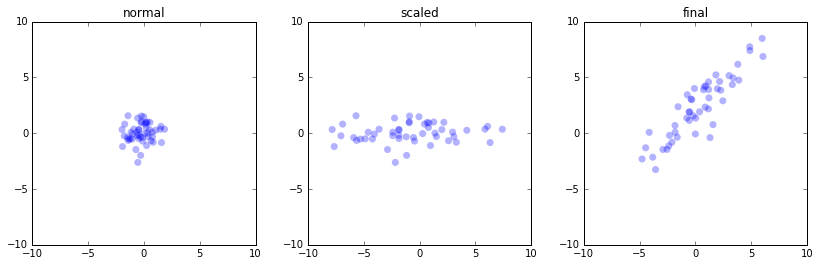

In [6]:
# generate many 2D (column) vectors 
np.random.seed(42)   #随机数种子
N = gaussian.rvs(0,1,(2,50))
# copy and scale it
S = np.copy(N)
S[0,:] *= 4  # scale axis 0
# rotate it
f = +pi/4    # rotate by 45 degrees
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)
# shift it
X += np.array([[1],[3]])

figure(figsize=(14,4)); #xlim(-10,10); ylim(-10,10);
subplot(1,3,1).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('normal')
scatter(N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,2).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('scaled')
scatter(S[0,:],S[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,3).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('final')
scatter(X[0,:],X[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [3]:
# subtract sample mean
avg = mean(X, axis=1).reshape(X[:,1].size,1)   #按行求，说明每行是一个随机变量的realization
X -= avg
# sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 
print "Average\n", avg
print "Covariance\n", C
#X[0,:].size-1 列数-1 每个随机变量的样本数

Average
[[ 0.34969052]
 [ 2.37483646]]
Covariance
[[ 6.99670167  6.59167706]
 [ 6.59167706  7.71554082]]


49

In [5]:
# eigen decomposition of sample covariance matrix
L, E = np.linalg.eig(C)
E, L

(array([[-0.72610102, -0.68758803],
        [ 0.68758803, -0.72610102]]), array([  0.75465255,  13.95758994]))

In [6]:
# singular value decomposition of covariance yields the same
E, L, E_same = np.linalg.svd(C)
E, L#compare with upper value 只是ek的排列不同,基向量和特征值组成相同；
#特征值按从大到小排列

(array([[-0.68758803, -0.72610102],
        [-0.72610102,  0.68758803]]), array([ 13.95758994,   0.75465255]))

In [7]:
# it's a rotation!
E.dot(E.T)   #单纯的E,E.T都是旋转

array([[ 1.,  0.],
       [ 0.,  1.]])

In [8]:
# also 
np.allclose( E.T, np.linalg.inv(E) )

True

In [6]:
# singular value decomposition of data matrix yields also the same
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)#need to multiply a correction
#X不是方阵，体现在V上了，50*50

(array([[-0.68758803, -0.72610102],
        [-0.72610102,  0.68758803]]), array([ 13.95758994,   0.75465255]))

In [7]:
# check out the properties of U and V
[ np.allclose( U.T.dot(U), np.eye(U[:,0].size) ), 
  np.allclose( V.T.dot(V), np.eye(V[:,0].size) )  ]

[True, True]

In [8]:
# principle components from sklearn
from sklearn import decomposition

In [12]:
# object-oriented interface,得出的结果是一个PCA对象
pca = decomposition.PCA(n_components=X[:,0].size)#   向量维数
# sklearn uses a different convention
pca.fit(X.T) # note the transpose
# pca.transform(X.T)
print pca.components_.T, pca.explained_variance_

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [ 13.67843814   0.7395595 ]


In [13]:
# bug in the sklearn code?
print E, L

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [ 13.95758994   0.75465255]


In [14]:
# without bessel correction,n/(n-1)
print U, W**2 / X[0,:].size

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [ 13.67843814   0.7395595 ]


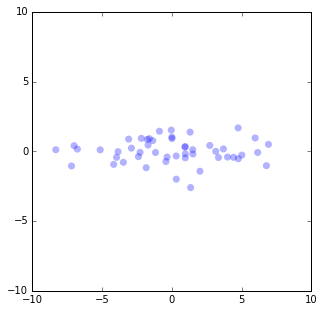

In [15]:
# rotation
A = E.T.dot(X);   #E是逆时针转,E.T顺时针转
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(A[0,:],A[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

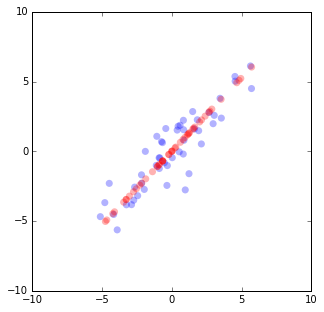

In [16]:
# projected points
P = E[:,0:1].dot(E[:,0:1].T).dot(X)   #取了第一主成分,也就是最大方差,描绘出来就是按照这个方向的投影线
#P=E.dot(E.T).dot(X)   #所有主成分都取,就是原图
R = X - P  # residuals

figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
#quiver(P[0,:],P[1,:],R[0,:],R[1,:],angles='xy',scale_units='xy',scale=1,alpha=.5)
scatter(X[0,:],X[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');

### Whitening
- Frequently used to preprocess data, e.g., in signal processing

>$ \displaystyle Z = \Lambda^{-1/2}\ E^T\ X$

- Verify that its covariance matrix is identity

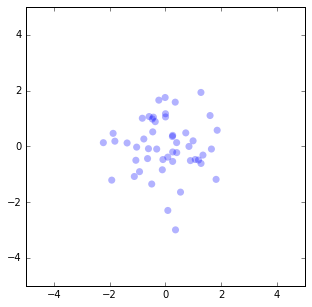

In [17]:
# calc and plot whitened coordinates
B = diag(1/sqrt(L)).dot(A)   #L只提供了特征值，需要生成对应的对角阵
figure(figsize=(5,5)); xlim(-5,5); ylim(-5,5);
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

NameError: name 'B' is not defined

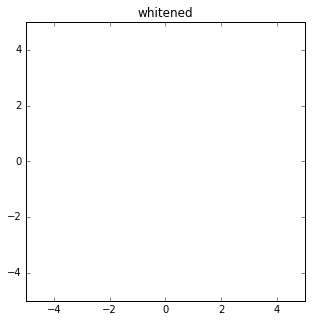

In [9]:
# cf. original normal randoms
figure(figsize=(11,5)); 
subplot(1,2,1).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('whitened')
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,2,2).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('original')
scatter(-N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

### Inverse of the Covariance Matrix

- Inverse of the diagonal eigenvalue matrix

>$\displaystyle \Lambda^{-1} =  \left( \begin{array}{ccc}
\frac{1}{\lambda_1} &  & \cdots & 0\\
 & \frac{1}{\lambda_2} &   & \vdots\\
\vdots &  & \ddots &  \\
0 & \cdots &  & \frac{1}{\lambda_N} \\
\end{array} \right)$

- Inverse of the covariance matrix

>$\displaystyle C^{-1} = E\ \Lambda^{-1} E^T$

- Also see pseudoinverse with small eigenvalues 

### Scree Plot

- The eigenvalue spectrum

>$ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$

- How many important directions?

> Keep $K =\,?$ principal components

- Explained variance 

> Cf. $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]+\mathbb{Var}[Y]$

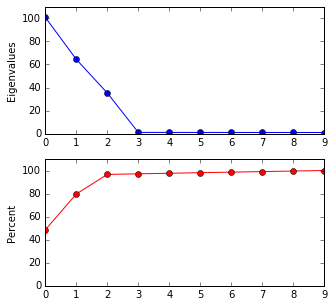

In [10]:
# generate 10-D vectors: scale, rotate
Z = gaussian.rvs(0,1,(10,10000))   
for i in range(3): 
    Z[i,:] *= 10 - 2*i
M = random.randn(Z[:,0].size,Z[:,0].size)
Q,_ = np.linalg.qr(M) 
Y = Q.dot(Z) # quick-n-dirty random rotation

# pca with svd
Y -= mean(Y, axis=1).reshape(Y[:,1].size,1)
#matshow(X.dot(X.T),fignum=100)
U, W, _ = np.linalg.svd(Y)
L = W**2 / (Y[0,:].size-1)

# plots
figure(figsize=(5,5));
subplot(211); ylim(0,110); plot(L,'o-'); ylabel('Eigenvalues');
subplot(212); ylim(0,110); cl=cumsum(L); ylabel('Percent');
plot(100*cl/cl[-1],'o-r'); 

array([ 100.79689264,   64.38545212,   35.20277158,    1.04135157,
          1.03785974,    1.01751068,    0.99612238,    0.99187875,
          0.97628342,    0.96377725])